In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score


In [2]:
df = pd.read_csv('data/Vehicle_Price.csv')


In [3]:
df

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [10]:
def cardinalidad(df_in, umbral_categoria, umbral_continua = 0.05):
    '''
    Esta función obtiene la cardinalidad de cada una de las variables y en función de dicha cardinalidad sugiere un tipo de variable.
    Los tipos posibles son: binaria, categórica, numérica discreta y numérica continua.
    Nota: los tipos mostrados en el DataFrame que retorna la función son solo una sugerencia, es mejor guardar el DataFrame en una variable y modificar los tipos si es necesario.

    
    Argumentos:
    
    df_in (pd.DataFrame): dataset en formato DataFrame para clasificar sus variables.

    umbral_categoría (int): número máximo de valores únicos para clasificar una variable como categórica.

    umbral_continua (int): porcentaje mínimo de valores únicos que debe tener una variable para clasificarla como numérica continua.

    
    Retorna:

    pd.DataFrame: DataFrame con 4 columnas: nombre de la variable, cardinalidad, porcentaje de valores únicos y tipo sugerido
    '''


    cardinalidad = [df_in[col].nunique() for col in df_in.columns]
    cardinalidad_por = [df_in[col].nunique()/len(df_in[col]) for col in df_in.columns]
    dict_df = {"nombre_variable": df_in.columns, "valores_unicos": cardinalidad, "cardinalidad": cardinalidad_por}
    nuevo_df = pd.DataFrame(dict_df)
    nuevo_df["tipo_sugerido"] = "Categórica"
    nuevo_df.loc[nuevo_df["valores_unicos"] == 2, "tipo_sugerido"] = "Binaria"
    nuevo_df.loc[nuevo_df["valores_unicos"] >= umbral_categoria, "tipo_sugerido"] = "Numerica Discreta"
    nuevo_df.loc[nuevo_df["cardinalidad"] >= umbral_continua, "tipo_sugerido"] = "Numerica Continua"
    return nuevo_df


def describe_df(df_in):

    '''
    Esta función obtiene para las variables de un dataset el tipo de datos que contienen, su porcentaje de nulos, sus valores únicos y su cardinalidad.

    
    Argumentos:
    
    df_in (pd.DataFrame): dataset en formato DataFrame para obtener los datos mencionados.

    
    Retorna:

    pd.DataFrame: un DataFrame cuyas columnas son las mismas que las del DataFrame que se pasa como argumento y cuyas filas son los datos que se proporciona sobre las variables, a saber: tipo de datos que contienen, porcentaje de nulos, valores únicos y cardinalidad.
    '''

    data_type = [df_in[col].dtype for col in df_in.columns]
    missings = [df_in[col].isna().value_counts(normalize = True)[True] if True in df_in[col].isna().value_counts().index else 0.0 for col in df_in.columns ]
    cardinalidad = [df_in[col].nunique() for col in df_in.columns]
    cardinalidad_por = [df_in[col].nunique()/len(df_in[col]) for col in df_in.columns]
    dict_df = {"DATA_TYPE": data_type, "MISSINGS (%)": missings, "UNIQUE_VALUES": cardinalidad, "CARDIN (%)": cardinalidad_por}
    nuevo_df = pd.DataFrame(dict_df, df_in.columns)
    return nuevo_df.T

In [11]:
describe_df(df)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
DATA_TYPE,object,object,object,object,int64,float64,object,float64,object,float64,object,object,object,float64,object,object,object
MISSINGS (%),0.0,0.055888,0.0,0.0,0.0,0.022954,0.001996,0.10479,0.006986,0.033932,0.001996,0.000998,0.002994,0.006986,0.00499,0.037924,0.0
UNIQUE_VALUES,358,761,28,153,3,859,100,5,7,95,38,197,8,4,263,91,4
CARDIN (%),0.357285,0.759481,0.027944,0.152695,0.002994,0.857285,0.0998,0.00499,0.006986,0.09481,0.037924,0.196607,0.007984,0.003992,0.262475,0.090818,0.003992


In [13]:
variables_num = df.select_dtypes(include = ["int64", "float64"]).columns
variables_cat = ["make","engine", "fuel", "transmission", "trim", "body", "exterior_color","interior_color","drivetrain"]

In [86]:
df_limpio = df.copy()

In [87]:
df_limpio.drop(columns = ["description"], inplace = True)

In [88]:
df_limpio.loc[df_limpio.cylinders.isna()] 

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
14,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
28,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,2024,52190.0,c,NaN,Electric,6.0,1-Speed Automatic,2LT,SUV,4.0,Radiant Red,Black,All-wheel Drive
33,2024 Kia EV6 GT,Kia,EV6,2024,49820.0,c,NaN,Electric,13.0,Automatic,GT,SUV,4.0,Yacht Blue,Black,All-wheel Drive
35,2024 Ford Mustang Mach-E Premium,Ford,Mustang Mach-E,2024,47790.0,c,NaN,Electric,5.0,1-Speed Automatic,Premium,SUV,4.0,Vapor Blue,Black,All-wheel Drive
49,2024 Hyundai IONIQ 5 SE Standard Range,Hyundai,IONIQ 5,2024,44195.0,c,NaN,Electric,14.0,1-Speed Automatic,SE Standard Range,SUV,4.0,Atlas,Gray,Rear-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2024 BMW i7 M70,BMW,i7,2024,195895.0,c,NaN,Electric,0.0,1-Speed Automatic,M70,Sedan,4.0,Gray Metallic,Caramel,All-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive
941,2024 Hyundai IONIQ 5 SE,Hyundai,IONIQ 5,2024,38201.0,c,NaN,Electric,12.0,Automatic,SE,SUV,4.0,Teal,Gray,Rear-wheel Drive
944,2024 Kia EV6 Wind,Kia,EV6,2024,41528.0,c,NaN,Electric,13.0,Automatic,Wind,SUV,4.0,Blue,Black,All-wheel Drive


In [89]:
df_limpio.loc[df_limpio.cylinders.isna(),"cylinders"] = 0

In [90]:
df_limpio.isna().sum()

name               0
make               0
model              0
year               0
price             23
engine             2
cylinders          0
fuel               7
mileage           34
transmission       2
trim               1
body               3
doors              7
exterior_color     5
interior_color    38
drivetrain         0
dtype: int64

In [91]:
df_limpio.loc[df_limpio.price.isna()] 

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
142,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,0.0,Electric,8.0,Automatic,Base 4MATIC,Sedan,4.0,Graphite Gray Metallic,Gray,All-wheel Drive
248,2024 Dodge Durango Pursuit,Dodge,Durango,2024,NaN,16V MPFI OHV,8.0,Gasoline,28.0,8-Speed Automatic,Pursuit,SUV,4.0,DB Black Crystal Clearcoat,Black,All-wheel Drive
283,2023 Chrysler 300 Touring,Chrysler,300,2023,NaN,24V MPFI DOHC,6.0,Gasoline,10.0,8-Speed Automatic,Touring,Sedan,4.0,Velvet Red Pearlcoat,Black,Rear-wheel Drive
328,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,0.0,Electric,10.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
372,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,0.0,Electric,4.0,Automatic,Base 4MATIC,Sedan,4.0,Polar White,Macchiato Beige,All-wheel Drive
417,2024 RAM 3500 Tradesman,RAM,3500,2024,NaN,16V MPFI OHV,8.0,Gasoline,98.0,8-Speed Automatic,Tradesman,Pickup Truck,2.0,Bright White Clearcoat,Black,Four-wheel Drive
434,2023 Chrysler 300 Touring,Chrysler,300,2023,NaN,24V MPFI DOHC,6.0,Gasoline,10.0,8-Speed Automatic,Touring,Sedan,4.0,Gloss Black,Black,Rear-wheel Drive
443,2024 Jeep Compass Limited,Jeep,Compass,2024,NaN,16V GDI DOHC Turbo,4.0,Gasoline,0.0,8-Speed Automatic,Limited,SUV,4.0,Metallic,NaN,Four-wheel Drive
500,2024 Ford Edge SE,Ford,Edge,2024,NaN,16V GDI DOHC Turbo,4.0,Gasoline,823.0,8-Speed Automatic,SE,SUV,4.0,Oxford White,Ebony,All-wheel Drive
506,2024 Dodge Durango Pursuit,Dodge,Durango,2024,NaN,24V MPFI DOHC,6.0,Gasoline,21.0,8-Speed Automatic,Pursuit,SUV,4.0,DB Black Crystal Clearcoat,Black,All-wheel Drive


In [27]:
df_limpio.loc[df_limpio.doors.isna()] 

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
124,2024 Hyundai Santa Fe Calligraphy,Hyundai,Santa Fe,2024,49905.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,Calligraphy,SUV,NaN,Green,Black,All-wheel Drive
190,2024 Hyundai Santa Fe XRT,Hyundai,Santa Fe,2024,42455.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,XRT,SUV,NaN,Shimmering Silver,Black,All-wheel Drive
215,2024 Hyundai Santa Fe SE 2.4,Hyundai,Santa Fe,2024,38100.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,SE 2.4,SUV,NaN,White,Gray,All-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
857,2025 Chevrolet Trax ACTIV,Chevrolet,Trax,2025,26190.0,der,6.0,Gasoline,1.0,Automatic,ACTIV,SUV,NaN,Summit White,Black,Front-wheel Drive


In [92]:
df_limpio.loc[df_limpio.doors.isna(), "doors"] = 5

In [93]:
df_limpio.loc[df_limpio.mileage.isna()] 

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
27,2024 Chrysler Pacifica Touring-L,Chrysler,Pacifica,2024,48705.0,24V MPFI DOHC,6.0,Gasoline,NaN,9-Speed Automatic,Touring-L,Passenger Van,4.0,Diamond Black,Black,All-wheel Drive
47,2024 Subaru Outback Wilderness,Subaru,Outback,2024,44354.0,16V GDI DOHC Turbo,4.0,Gasoline,NaN,Automatic CVT,Wilderness,SUV,4.0,Magnetite,Gray,All-wheel Drive
63,2024 Jeep Grand Cherokee L Limited,Jeep,Grand Cherokee L,2024,51360.0,24V MPFI DOHC,6.0,Gasoline,NaN,8-Speed Automatic,Limited,SUV,4.0,Bright White Clearcoat,Beige / Black,Rear-wheel Drive
73,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,63057.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Metallic,Black,Four-wheel Drive
84,2024 Jeep Grand Cherokee L Limited,Jeep,Grand Cherokee L,2024,49390.0,OHV,6.0,Gasoline,NaN,8-Speed Automatic,Limited,SUV,4.0,Diamond Black,Global Black,Four-wheel Drive
87,2024 Buick Envista Avenir,Buick,Envista,2024,31805.0,12V GDI DOHC Turbo,3.0,Gasoline,NaN,6-Speed Automatic,Avenir,SUV,4.0,Ocean Blue Metallic,Ebony,Front-wheel Drive
93,2024 Ford Ranger XL,Ford,Ranger,2024,38740.0,16V GDI DOHC Turbo,4.0,Gasoline,NaN,10-Speed Automatic,XL,Pickup Truck,4.0,Carbonized Gray Metallic,Ebony,Four-wheel Drive
177,2024 Lincoln Nautilus Reserve,Lincoln,Nautilus,2024,64370.0,16V GDI DOHC Turbo,4.0,Gasoline,NaN,8-Speed Automatic,Reserve,SUV,4.0,Gray Metallic,Black Onyx,All-wheel Drive
217,2024 Jeep Wrangler 4xe Sport,Jeep,Wrangler 4xe,2024,50755.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,NaN,8-Speed Automatic,Sport,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
219,2024 Honda Prologue TOURING,Honda,Prologue,2024,55800.0,c,0.0,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive


In [94]:
df_back1 = df_limpio.copy()

In [95]:
df_limpio.dropna(subset = [ "mileage"], inplace = True)

In [96]:
df_limpio.isna().sum()

name               0
make               0
model              0
year               0
price             23
engine             2
cylinders          0
fuel               4
mileage            0
transmission       2
trim               1
body               3
doors              0
exterior_color     5
interior_color    38
drivetrain         0
dtype: int64

In [97]:
df_limpio.loc[df_limpio.price.isna()] 

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
142,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,0.0,Electric,8.0,Automatic,Base 4MATIC,Sedan,4.0,Graphite Gray Metallic,Gray,All-wheel Drive
248,2024 Dodge Durango Pursuit,Dodge,Durango,2024,NaN,16V MPFI OHV,8.0,Gasoline,28.0,8-Speed Automatic,Pursuit,SUV,4.0,DB Black Crystal Clearcoat,Black,All-wheel Drive
283,2023 Chrysler 300 Touring,Chrysler,300,2023,NaN,24V MPFI DOHC,6.0,Gasoline,10.0,8-Speed Automatic,Touring,Sedan,4.0,Velvet Red Pearlcoat,Black,Rear-wheel Drive
328,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,0.0,Electric,10.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
372,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,2024,NaN,c,0.0,Electric,4.0,Automatic,Base 4MATIC,Sedan,4.0,Polar White,Macchiato Beige,All-wheel Drive
417,2024 RAM 3500 Tradesman,RAM,3500,2024,NaN,16V MPFI OHV,8.0,Gasoline,98.0,8-Speed Automatic,Tradesman,Pickup Truck,2.0,Bright White Clearcoat,Black,Four-wheel Drive
434,2023 Chrysler 300 Touring,Chrysler,300,2023,NaN,24V MPFI DOHC,6.0,Gasoline,10.0,8-Speed Automatic,Touring,Sedan,4.0,Gloss Black,Black,Rear-wheel Drive
443,2024 Jeep Compass Limited,Jeep,Compass,2024,NaN,16V GDI DOHC Turbo,4.0,Gasoline,0.0,8-Speed Automatic,Limited,SUV,4.0,Metallic,NaN,Four-wheel Drive
500,2024 Ford Edge SE,Ford,Edge,2024,NaN,16V GDI DOHC Turbo,4.0,Gasoline,823.0,8-Speed Automatic,SE,SUV,4.0,Oxford White,Ebony,All-wheel Drive
506,2024 Dodge Durango Pursuit,Dodge,Durango,2024,NaN,24V MPFI DOHC,6.0,Gasoline,21.0,8-Speed Automatic,Pursuit,SUV,4.0,DB Black Crystal Clearcoat,Black,All-wheel Drive


In [98]:
df_limpio.dropna(subset = ["price", "interior_color"], inplace = True)

In [99]:
df_limpio.isna().sum()

name              0
make              0
model             0
year              0
price             0
engine            2
cylinders         0
fuel              4
mileage           0
transmission      1
trim              1
body              3
doors             0
exterior_color    2
interior_color    0
drivetrain        0
dtype: int64

In [100]:
df_limpio.loc[df_limpio.engine.isna()] 

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,5.0,Canyon,Black,All-wheel Drive
803,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,73999.0,NaN,6.0,Gasoline,59.0,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive


In [101]:
df_limpio.loc[df_limpio.name == "2024 Jeep Wagoneer Series II"] 

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
250,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,87488.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,22.0,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Global Black,Four-wheel Drive
650,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,84935.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,1.0,8-Speed Automatic,Series II,SUV,4.0,Velvet Red Pearlcoat,Global Black,Four-wheel Drive
772,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,79487.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,18.0,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Black,Four-wheel Drive
803,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,73999.0,NaN,6.0,Gasoline,59.0,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
970,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74625.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,Silver,Global Black,Four-wheel Drive


In [55]:
def impute_data(df, feature, strategy = "mode", value = None):
    '''
    Esta función imputa los valores nulos de una variable de un DataFrame según la estrategia indicada.
    
    Argumentos:
    
    df (pd.DataFrame): DataFrame con los datos a imputar.
    
    feature (str): nombre de la variable a imputar.
    
    strategy (str): estrategia de imputación. Puede ser "mode" para la moda, "mean" para la media, "median" para la mediana o "value" para un valor concreto.
    
    value: valor concreto a utilizar si strategy es "value".
    
    Retorna:
    
    pd.DataFrame: DataFrame con los valores nulos de la variable imputados.
    '''
    for col in df.index:
        if df[feature][col]== None or pd.isna(df[feature][col]):
            df[feature][col] = df.loc[(df["name"] == df["name"][col]) & (df["transmission"] == df["transmission"][col]),feature].mode()[0] if strategy == "mode" else \
                df[feature].mean() if strategy == "mean" else df[feature].median() if strategy == "median" else value


    return df

In [102]:
impute_data(df_limpio, "engine", strategy = "mode")

KeyError: 0

In [57]:
df_limpio.isna().sum()

name              0
make              0
model             0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              1
body              3
doors             0
exterior_color    1
interior_color    0
drivetrain        0
dtype: int64

In [143]:
df_limpio = df_back1.copy()

In [144]:
df_limpio.isna().sum()

name               0
make               0
model              0
year               0
price             23
engine             2
cylinders          0
fuel               7
mileage           34
transmission       2
trim               1
body               3
doors              0
exterior_color     5
interior_color    38
drivetrain         0
dtype: int64

In [145]:
impute_data(df_limpio, "engine", strategy = "mode")


KeyError: 0

In [146]:
impute_data(df_limpio, "price", strategy = "mean")
impute_data(df_limpio, "mileage", strategy = "mean")

C:\Users\luis_\AppData\Local\Temp\ipykernel_29604\2136564648.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[feature][col] = df.loc[(df["name"] == df["name"][col]) & (df["transmission"] == df["transmission"][col]),feature].mode()[0] 

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive


In [147]:
df_limpio.isna().sum()

name               0
make               0
model              0
year               0
price              0
engine             2
cylinders          0
fuel               7
mileage            0
transmission       2
trim               1
body               3
doors              0
exterior_color     5
interior_color    38
drivetrain         0
dtype: int64

In [148]:

df_limpio.dropna(subset = ["interior_color", "exterior_color"], inplace = True)


In [149]:
df_limpio.isna().sum()

name              0
make              0
model             0
year              0
price             0
engine            2
cylinders         0
fuel              7
mileage           0
transmission      1
trim              1
body              3
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [150]:
df_limpio.loc[df_limpio.trim.isna()]


,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
805,2023 Ford Transit-350,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [151]:
df_limpio.loc[df_limpio.body.isna()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
164,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive
687,2024 INFINITI QX50 SPORT,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive


In [152]:
df_limpio.loc[df_limpio.body.isna(),"body"] = "SUV"

In [153]:
describe_df(df_limpio)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
DATA_TYPE,object,object,object,int64,float64,object,float64,object,float64,object,object,object,float64,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.002079,0.0,0.007277,0.0,0.00104,0.00104,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,343,27,150,3,827,99,5,7,94,37,190,8,4,257,91,4
CARDIN (%),0.356549,0.028067,0.155925,0.003119,0.859667,0.102911,0.005198,0.007277,0.097713,0.038462,0.197505,0.008316,0.004158,0.267152,0.094595,0.004158


In [154]:
impute_data(df_limpio, "fuel", strategy = "mode")

KeyError: 0

In [155]:
df_limpio.dropna(subset = ["trim", "fuel"], inplace = True)

In [156]:
df_limpio.dropna(subset = ["transmission", "engine"], inplace = True)

In [157]:
describe_df(df_limpio)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
DATA_TYPE,object,object,object,int64,float64,object,float64,object,float64,object,object,object,float64,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,337,26,146,3,818,97,5,7,94,36,188,8,4,252,91,4
CARDIN (%),0.354364,0.02734,0.153523,0.003155,0.860147,0.101998,0.005258,0.007361,0.098843,0.037855,0.197687,0.008412,0.004206,0.264984,0.095689,0.004206


In [158]:
train_set, test_set = train_test_split(df_limpio, test_size = 0.2, stratify=df_limpio["make"], random_state = 42)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [159]:
df_limpio.make.unique()

array(['Jeep', 'GMC', 'Dodge', 'RAM', 'Nissan', 'Ford', 'Hyundai',
       'Chevrolet', 'Volkswagen', 'Chrysler', 'Kia', 'Mazda', 'Subaru',
       'Audi', 'BMW', 'Toyota', 'Buick', 'Mercedes-Benz', 'Honda',
       'Lincoln', 'Cadillac', 'INFINITI', 'Lexus', 'Land Rover', 'Volvo',
       'Genesis'], dtype=object)

In [160]:
df_limpio["years_old"] = 2025 - df_limpio["year"]

In [161]:
df_limpio.year.unique()

array([2024, 2023, 2025])

In [162]:
train_set, test_set = train_test_split(df_limpio, test_size = 0.2, random_state = 42)

In [163]:
df_limpio.to_csv("data/Vehicle_Price_Cleaned.csv", index = False)

In [164]:
train_set[variables_num]

,year,price,cylinders,mileage,doors
332,2024,35999.0,4.0,0.0,4.0
572,2024,67190.0,4.0,12.0,4.0
585,2024,49180.0,8.0,2.0,4.0
113,2024,34000.0,4.0,10.0,4.0
81,2024,96410.0,8.0,0.0,4.0
...,...,...,...,...,...
110,2024,45005.0,0.0,12.0,4.0
282,2024,77885.0,8.0,105.0,4.0
908,2024,50415.0,4.0,6.0,4.0
457,2024,29826.0,4.0,6.0,4.0


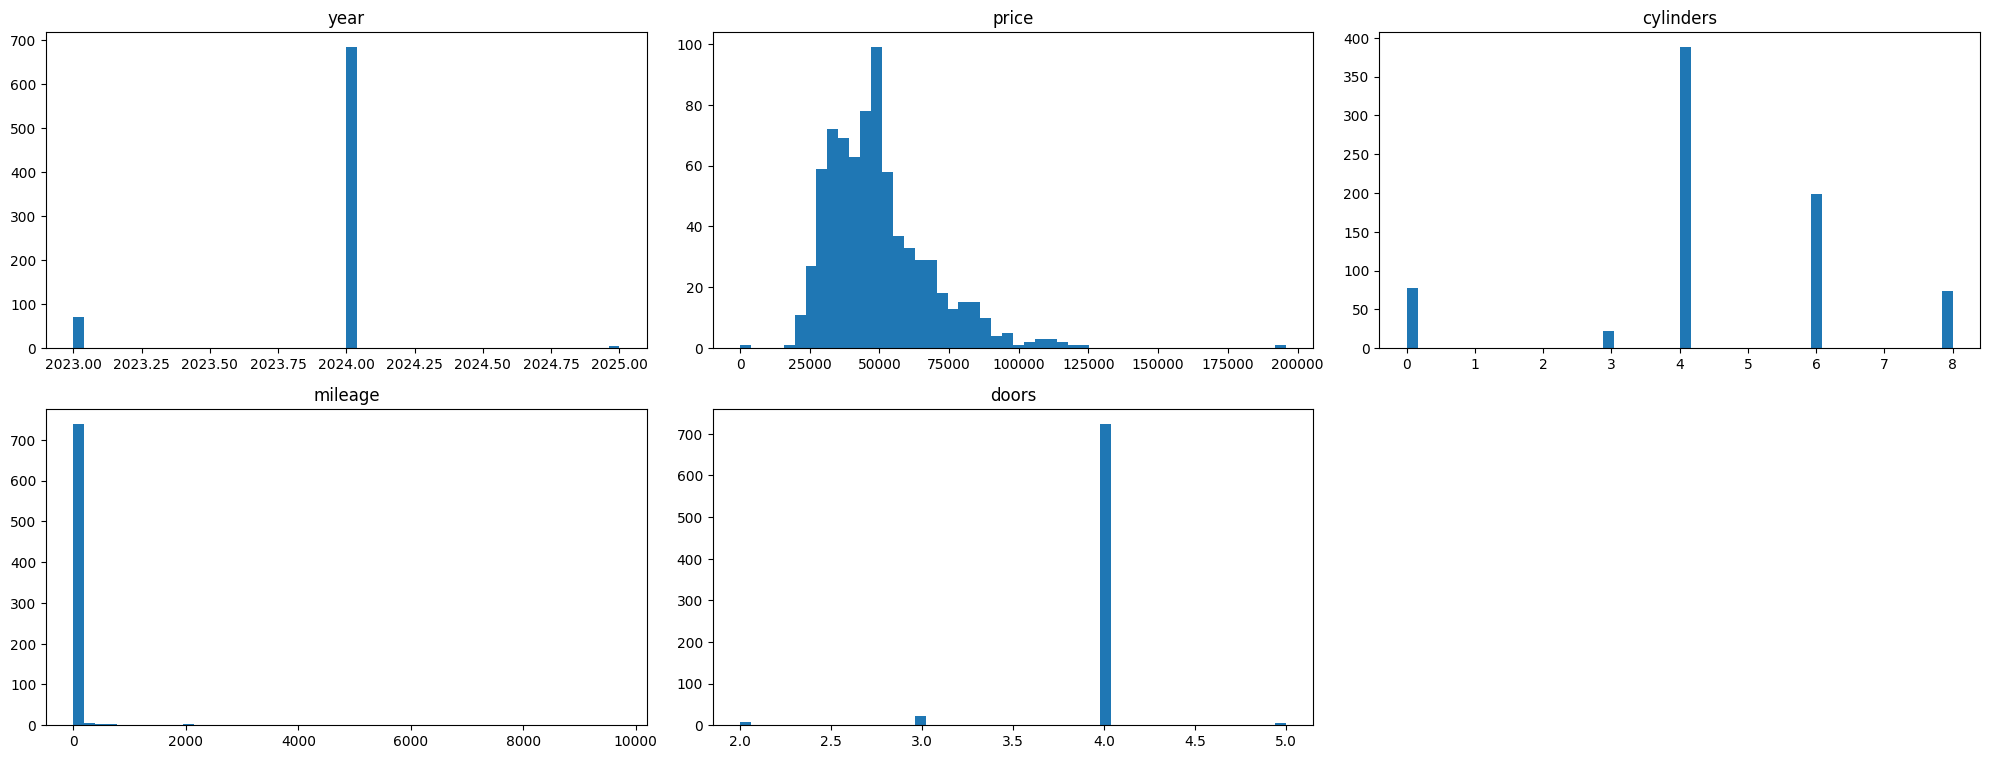

In [165]:
train_set[variables_num].hist(bins = 50, figsize = (20, 15), layout = (4, 3), grid = False)
plt.tight_layout()

In [166]:
train_set.describe()

,year,price,cylinders,mileage,doors,years_old
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,2023.911842,49740.486541,4.478947,69.765474,3.952632,1.088158
std,0.301715,18636.274768,2.007779,515.511406,0.286487,0.301715
min,2023.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2024.000000,36318.250000,4.000000,4.000000,4.000000,1.000000
50%,2024.000000,46954.000000,4.000000,9.000000,4.000000,1.000000
75%,2024.000000,58449.000000,6.000000,14.000000,4.000000,1.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000,2.000000


In [167]:
train_set_scaled = train_set.copy()

In [168]:
train_set_scaled.mileage = np.log(train_set_scaled.mileage + 1)


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'cylinders'}>],
       [<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'doors'}>,
        <Axes: title={'center': 'years_old'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

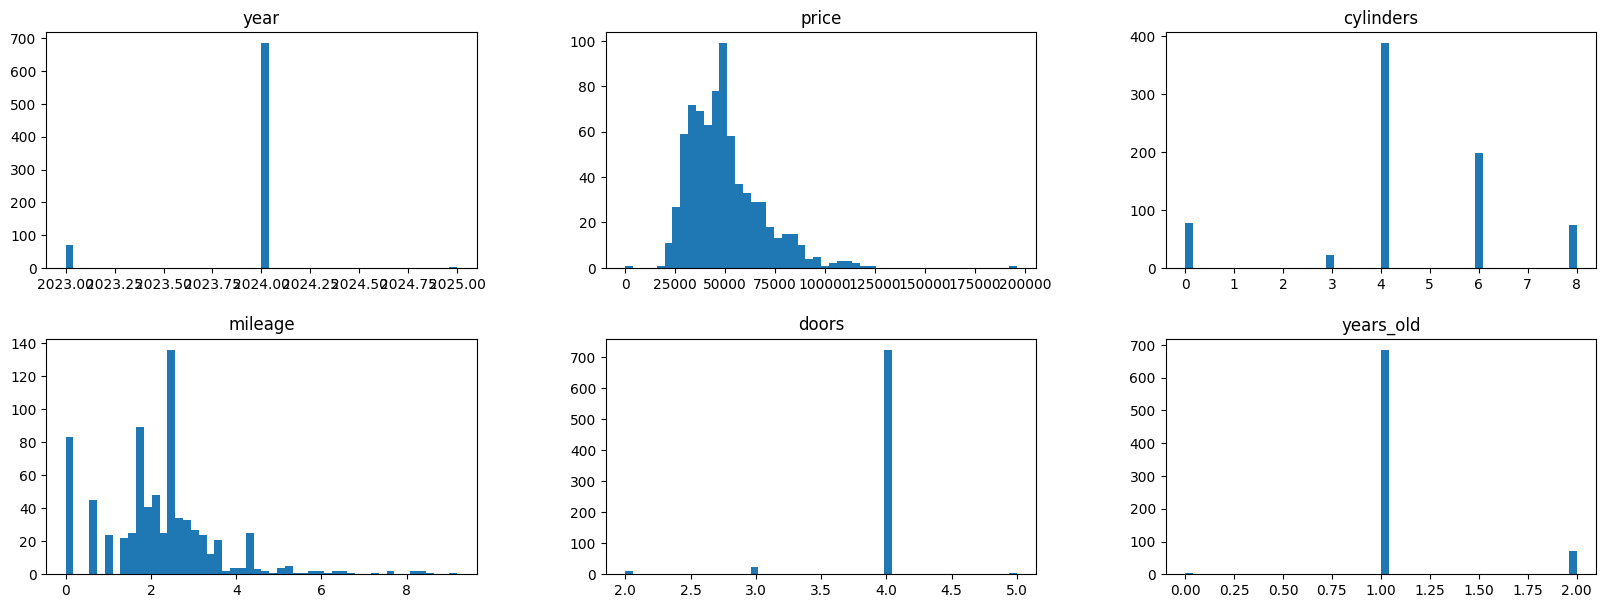

In [170]:
train_set_scaled.hist(bins = 50, figsize = (20, 15), layout = (4, 3), grid = False)

In [171]:
target = "price"

<Axes: >

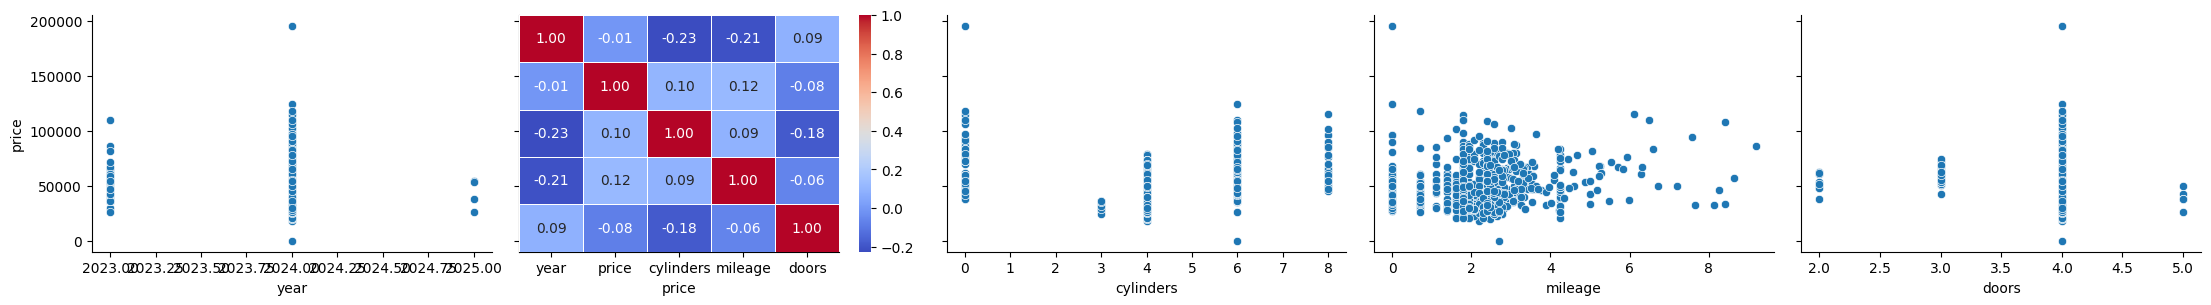

In [172]:
sns.pairplot(train_set_scaled, x_vars = variables_num, y_vars = [target], height = 3, aspect = 1.5)
sns.heatmap(train_set_scaled[variables_num].corr(), annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)

In [180]:
variables_num.insert(-1,"years_old")

Index(['year', 'price', 'cylinders', 'mileage', 'years_old', 'doors'], dtype='object')

<Axes: >

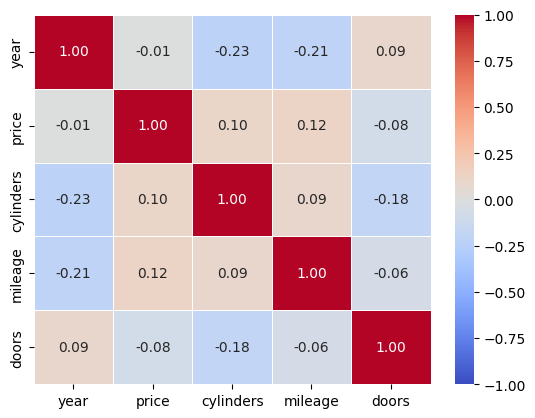

In [182]:
sns.heatmap(train_set_scaled[variables_num].corr(), annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5, vmin = -1, vmax = 1)

In [183]:
df_limpio.years_old.describe()

count    951.000000
mean       1.087277
std        0.300449
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: years_old, dtype: float64

In [185]:
train_set_rf = train_set.copy()
train_set_rf["years_old"] = 2025 - train_set_rf["year"]

<Axes: >

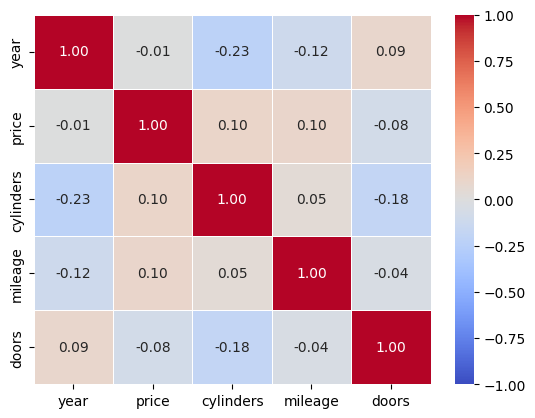

In [186]:
sns.heatmap(train_set_rf[variables_num].corr(), annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5, vmin = -1, vmax = 1)

In [187]:
train_set_rf

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
332,2024 Jeep Compass Latitude,Jeep,Compass,2024,35999.0,16V GDI DOHC Turbo,4.0,Gasoline,0.0,8-Speed Automatic,Latitude,SUV,4.0,Metallic,Black,Four-wheel Drive,1
572,2024 Jeep Wrangler 4xe Rubicon,Jeep,Wrangler 4xe,2024,67190.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,12.0,8-Speed Automatic,Rubicon,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive,1
585,2024 Chevrolet Silverado 1500 LT,Chevrolet,Silverado 1500,2024,49180.0,16V GDI OHV,8.0,Gasoline,2.0,Automatic,LT,Pickup Truck,4.0,Summit White,Jet Black,Four-wheel Drive,1
113,2024 Kia Sportage X-Line,Kia,Sportage,2024,34000.0,16V PDI DOHC,4.0,Gasoline,10.0,8-Speed Automatic,X-Line,SUV,4.0,Glacial White Pearl,Black,All-wheel Drive,1
81,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2024 Hyundai IONIQ 6 SEL,Hyundai,IONIQ 6,2024,45005.0,c,0.0,Electric,12.0,Automatic,SEL,Sedan,4.0,White,Black,Rear-wheel Drive,1
282,2024 Ford F-350 Lariat Super Duty,Ford,F-350,2024,77885.0,16V MPFI OHV,8.0,Gasoline,105.0,10-Speed Automatic,Lariat Super Duty,Pickup Truck,4.0,Black,Black Onyx,Four-wheel Drive,1
908,2024 Cadillac XT6 Luxury FWD,Cadillac,XT6,2024,50415.0,16V GDI DOHC Turbo,4.0,Gasoline,6.0,9-Speed Automatic,Luxury FWD,SUV,4.0,Crystal White Tri-Coat,Jet Black,Front-wheel Drive,1
457,2024 Jeep Compass Latitude Lux,Jeep,Compass,2024,29826.0,16V GDI DOHC Turbo,4.0,Gasoline,6.0,8-Speed Automatic,Latitude Lux,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive,1


In [188]:
describe_df(train_set_rf)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
DATA_TYPE,object,object,object,int64,float64,object,float64,object,float64,object,object,object,float64,object,object,object,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,303,26,137,3,671,92,5,7,85,34,172,8,4,227,85,4,3
CARDIN (%),0.398684,0.034211,0.180263,0.003947,0.882895,0.121053,0.006579,0.009211,0.111842,0.044737,0.226316,0.010526,0.005263,0.298684,0.111842,0.005263,0.003947


In [189]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
train_set_rf[variables_cat] = encoder.fit_transform(train_set_rf[variables_cat])

In [191]:
train_set_rf[variables_cat]

,make,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
332,13.0,8.0,4.0,16.0,73.0,6.0,122.0,4.0,1.0
572,13.0,9.0,5.0,16.0,103.0,6.0,39.0,4.0,1.0
585,4.0,10.0,4.0,28.0,64.0,5.0,205.0,41.0,1.0
113,14.0,14.0,4.0,16.0,158.0,6.0,81.0,4.0,0.0
81,8.0,45.0,4.0,28.0,42.0,6.0,205.0,76.0,1.0
...,...,...,...,...,...,...,...,...,...
110,11.0,68.0,3.0,28.0,111.0,7.0,222.0,4.0,3.0
282,7.0,13.0,4.0,2.0,72.0,5.0,26.0,8.0,1.0
908,3.0,8.0,4.0,24.0,79.0,6.0,51.0,41.0,2.0
457,13.0,8.0,4.0,16.0,74.0,6.0,39.0,4.0,1.0


In [192]:
test_set_rf = test_set.copy()
test_set_rf[variables_cat] = encoder.transform(test_set_rf[variables_cat])

ValueError: Found unknown categories ['ne 3L I-6 gasoline direct injection, DOHC, variable valve', '24V DOHC', 'rbo Regular Unleaded I-6 3.0 L/183', 'c ZEV', '4 DOHC, variable valve control, regular unleaded, engine'] in column 1 during transform

In [193]:
def agrupar_raros(df, col, umbral=0.01):
    freqs = df[col].value_counts(normalize=True)
    raros = freqs[freqs < umbral].index
    df[col] = df[col].replace(raros, "Otro")

In [196]:
df_limpio_processed = df_limpio.copy()

In [197]:
for col in variables_cat:
    agrupar_raros(df_limpio_processed, col)

In [198]:
describe_df(df_limpio_processed)

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
DATA_TYPE,object,object,object,int64,float64,object,float64,object,float64,object,object,object,float64,object,object,object,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,337,18,146,3,818,26,5,6,94,11,28,7,4,20,9,4,3
CARDIN (%),0.354364,0.018927,0.153523,0.003155,0.860147,0.02734,0.005258,0.006309,0.098843,0.011567,0.029443,0.007361,0.004206,0.02103,0.009464,0.004206,0.003155


In [204]:
df_limpio_processed["model"].value_counts()

model
Hornet                        64
3500                          52
Compass                       44
Durango                       41
CX-90 PHEV                    34
                              ..
C40 Recharge Pure Electric     1
Soul                           1
AMG C 43                       1
Maverick                       1
Forte                          1
Name: count, Length: 146, dtype: int64

In [205]:
variables_cat

['make',
 'engine',
 'fuel',
 'transmission',
 'trim',
 'body',
 'exterior_color',
 'interior_color',
 'drivetrain']

In [211]:
df_limpio_processed

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,1
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,1
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,Otro,8.0,Gasoline,0.0,Automatic,Otro,SUV,4.0,Summit White,Otro,Four-wheel Drive,1
3,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,2
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Otro,Black,Four-wheel Drive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,Mercedes-Benz,Sprinter 2500,2024,59037.0,Otro,4.0,Diesel,10.0,9-Speed Automatic,Otro,Cargo Van,3.0,Otro,Black,Rear-wheel Drive,1
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,Otro,Otro,SUV,4.0,Otro,Black,All-wheel Drive,1
999,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive,1
1000,2024 Nissan Murano SV Intelligent AWD,Nissan,Murano,2024,43495.0,Otro,6.0,Gasoline,6.0,Automatic,Otro,SUV,4.0,Otro,Otro,All-wheel Drive,1


In [212]:
columna_usar = variables_cat + variables_num + [target]
df_limpio_processed = df_limpio_processed[columna_usar]


ValueError: operands could not be broadcast together with shapes (9,) (5,) 

In [213]:
print(type(variables_cat))
print(type(variables_num))
print(type(target))

<class 'list'>
<class 'pandas.core.indexes.base.Index'>
<class 'str'>


In [214]:
variables_num = list(variables_num)

In [215]:
columna_usar = variables_cat + variables_num + [target]
df_limpio_processed = df_limpio_processed[columna_usar]

In [217]:
train_set, test_set = train_test_split(df_limpio_processed, test_size = 0.2, stratify=df_limpio_processed.make, random_state = 42)

In [219]:
train_set

,make,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain,year,price,cylinders,mileage,doors,price
915,Chrysler,24V MPFI DOHC,Gasoline,9-Speed Automatic,Otro,Passenger Van,Bright White Clearcoat,Black,Front-wheel Drive,2024,38954.0,6.0,5.0,4.0,38954.0
538,BMW,24V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Otro,Sedan,Otro,Black,Rear-wheel Drive,2024,103045.0,6.0,19.0,4.0,103045.0
371,Jeep,24V GDI DOHC Twin Turbo,Gasoline,8-Speed Automatic,Otro,SUV,Otro,Otro,Four-wheel Drive,2023,86097.0,6.0,9711.0,4.0,86097.0
960,Nissan,16V MPFI DOHC,Gasoline,Automatic CVT,SR,SUV,Otro,Charcoal,Front-wheel Drive,2024,25080.0,4.0,12.0,4.0,25080.0
411,Otro,16V GDI DOHC Turbo,Gasoline,9-Speed Automatic,Otro,SUV,Otro,Gray,All-wheel Drive,2024,57508.0,4.0,19.0,4.0,57508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Hyundai,c,Electric,Automatic,SEL,SUV,Gold,Gray,Rear-wheel Drive,2024,42201.0,0.0,8.0,4.0,42201.0
359,Jeep,24V MPFI DOHC,Gasoline,8-Speed Automatic,Limited,SUV,Metallic,Black,Four-wheel Drive,2024,50702.0,6.0,6.0,4.0,50702.0
226,Nissan,Otro,Gasoline,Otro,SR,SUV,Otro,Charcoal,Front-wheel Drive,2024,26600.0,4.0,15.0,4.0,26600.0
487,Jeep,"gasoline direct injection, DOHC, variable valv...",Gasoline,Automatic,Latitude,SUV,Otro,Black,Four-wheel Drive,2024,28867.0,4.0,8.0,4.0,28867.0


In [222]:
sns.pairplot(train_set, x_vars = variables_num, y_vars = [target], height = 3, aspect = 1.5)

ValueError: Data must be 1-dimensional, got ndarray of shape (760, 2) instead

In [223]:
train_set.describe()

,year,price,cylinders,mileage,doors,price
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,2023.918421,50019.758909,4.490789,65.832710,3.950000,50019.758909
std,0.296981,18855.897387,1.983441,505.573719,0.295107,18855.897387
min,2023.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2024.000000,36523.750000,4.000000,4.000000,4.000000,36523.750000
50%,2024.000000,47229.500000,4.000000,8.000000,4.000000,47229.500000
75%,2024.000000,58868.500000,6.000000,13.000000,4.000000,58868.500000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000,195895.000000


In [224]:
df_limpio_processed.loc[df_limpio_processed.price == 0]

ValueError: Cannot index with multidimensional key

In [235]:
df_limpio2 = df_limpio.copy()

In [236]:
df_limpio2.loc[df_limpio2.price == 0]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
94,2024 Audi SQ5 Premium Plus,Audi,SQ5,2024,0.0,oled Turbo Premium Unleaded V-6 3.0 L/183,6.0,Gasoline,14.0,Automatic,Premium Plus,SUV,4.0,Ultra Blue Metallic,Black,All-wheel Drive,1


In [237]:
df_limpio2.loc[df_limpio2.name== "2024 Audi SQ5 Premium Plus"]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
94,2024 Audi SQ5 Premium Plus,Audi,SQ5,2024,0.0,oled Turbo Premium Unleaded V-6 3.0 L/183,6.0,Gasoline,14.0,Automatic,Premium Plus,SUV,4.0,Ultra Blue Metallic,Black,All-wheel Drive,1


In [238]:
df_limpio2.drop(df_limpio2[df_limpio2.price == 0].index, inplace = True)
df_limpio2.loc[df_limpio2.price == 0]

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old


In [239]:
df_limpio2.drop(columns = ["name","model","year"], inplace = True)

In [240]:
describe_df(df_limpio2)

,make,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
DATA_TYPE,object,float64,object,float64,object,float64,object,object,object,float64,object,object,object,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,26,817,96,5,7,94,36,188,8,4,251,91,4,3
CARDIN (%),0.027368,0.86,0.101053,0.005263,0.007368,0.098947,0.037895,0.197895,0.008421,0.004211,0.264211,0.095789,0.004211,0.003158


In [241]:
for col in variables_cat:
    agrupar_raros(df_limpio2, col, umbral= 0.005)

In [243]:
df_limpio2.loc[df_limpio2.exterior_color == "Otro"]

,make,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,years_old
14,Chevrolet,51695.0,c,0.0,Electric,4.0,1-Speed Automatic,Otro,SUV,4.0,Otro,Black,All-wheel Drive,1
15,Hyundai,38574.0,16V PDI DOHC Turbo,4.0,Gasoline,12.0,8-Speed Automatic with Auto-Shift,2.5T XRT,Pickup Truck,4.0,Otro,Black,All-wheel Drive,1
16,Nissan,48000.0,24V MPFI DOHC,6.0,Gasoline,87.0,Automatic CVT,Platinum,SUV,4.0,Otro,Otro,All-wheel Drive,1
21,Dodge,39491.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,5.0,6-Speed Automatic,R/T,SUV,4.0,Otro,Black,All-wheel Drive,1
23,GMC,44120.0,"4 gasoline direct injection, DOHC, variable va...",4.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Otro,Otro,All-wheel Drive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Jeep,54620.0,24V MPFI DOHC,6.0,Gasoline,5.0,Automatic,Sport,Pickup Truck,4.0,Otro,Black,Four-wheel Drive,1
997,Mercedes-Benz,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Otro,Cargo Van,3.0,Otro,Black,Rear-wheel Drive,1
998,Dodge,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Otro,Black,All-wheel Drive,1
1000,Nissan,43495.0,Otro,6.0,Gasoline,6.0,Automatic,Otro,SUV,4.0,Otro,Graphite,All-wheel Drive,1


In [244]:
train_set, test_set = train_test_split(df_limpio2, test_size = 0.2, stratify=df_limpio2.make, random_state = 42)

In [246]:
variables_num.remove("year")

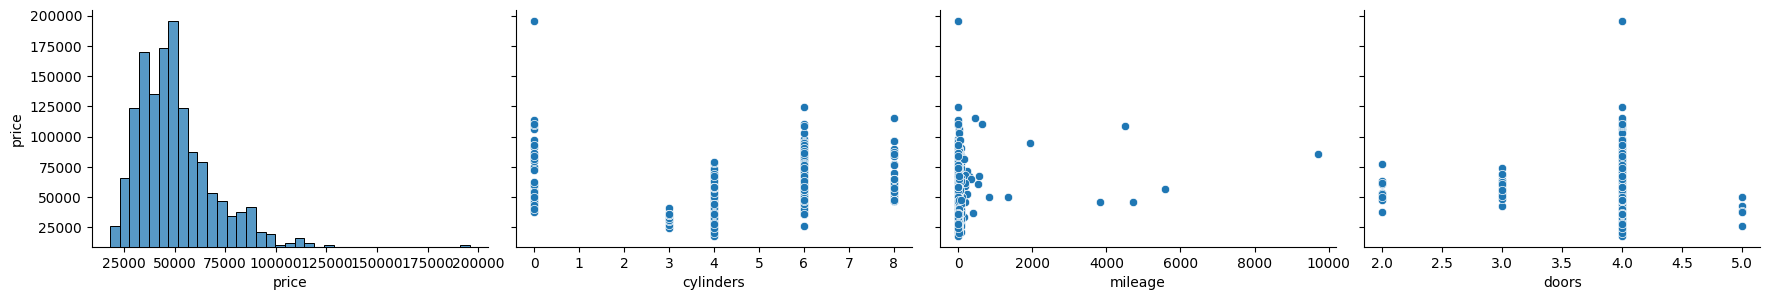

In [247]:
sns.pairplot(train_set, x_vars = variables_num, y_vars = [target], height = 3, aspect = 1.5)

<Axes: >

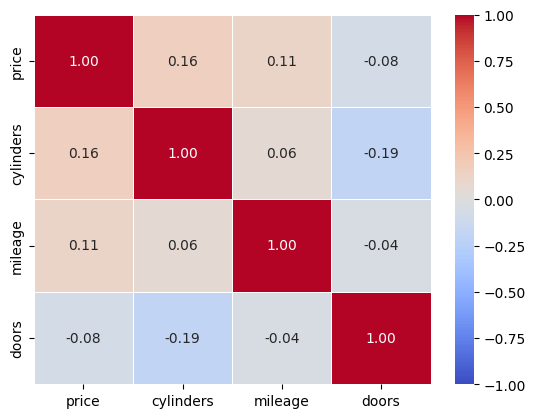

In [248]:
sns.heatmap(train_set[variables_num].corr(), annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5, vmin = -1, vmax = 1)

In [249]:
train_set_rf =train_set.copy()
train_set_rf[variables_cat] = encoder.fit_transform(train_set_rf[variables_cat])

In [250]:
test_set_rf = test_set.copy()
test_set_rf[variables_cat] = encoder.transform(test_set_rf[variables_cat])

In [251]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [252]:
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42)
}

In [253]:
x_train = train_set_rf[variables_num + variables_cat]
y_train = train_set_rf[target]
x_test = test_set_rf[variables_num + variables_cat]
y_test = test_set_rf[target]

In [255]:
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(x_train, y_train)
    pred = modelo.predict(x_test)
    
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    resultados.append({
        "Modelo": nombre,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R²": round(r2, 3)
    })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados).sort_values("RMSE")
print(df_resultados)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 760, number of used features: 13
[LightGBM] [Info] Start training from score 50095.849630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain